In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
generation_data = pd.read_csv('London_Array.csv')
generation_data = generation_data.tail(17520)
generation_data.head()

,Unnamed: 0,time,u100,v100,fsr,Windspeed,Scaled_Windspeed_(at_87m),Wind_Direction,Power_of_SWT-3.6-120,Turn_off,Power
333120,333120,2018-01-01 00:00:00,17.078888,4.597427,0.001291,17.686853,17.151846,195.06620,630.00000,1,630.00000
333121,333121,2018-01-01 01:00:00,16.730560,2.655579,0.001157,16.940004,16.427603,189.01910,630.00000,1,630.00000
333122,333122,2018-01-01 02:00:00,14.944077,3.232178,0.000626,15.289618,14.827190,192.20422,630.00000,1,630.00000
333123,333123,2018-01-01 03:00:00,13.681046,4.286087,0.000383,14.336720,13.903136,197.39507,627.58246,1,627.58246
333124,333124,2018-01-01 04:00:00,12.544296,5.975891,0.000285,13.894986,13.474771,205.47234,630.00000,1,630.00000


In [11]:
# Drop unnecessary columns


In [18]:
generation_data = generation_data.drop('Power_of_SWT-3.6-120', axis=1)

In [19]:
generation_data = generation_data.drop('Windspeed', axis=1)
generation_data = generation_data.drop('u100', axis=1)
generation_data = generation_data.drop('v100', axis=1)
generation_data = generation_data.drop('fsr', axis=1)

In [20]:
generation_data = generation_data.drop(generation_data.columns[0], axis=1)
generation_data = generation_data.drop('time', axis=1)

In [21]:
generation_data.count()

Scaled_Windspeed_(at_87m)    17520
Wind_Direction               17520
Turn_off                     17520
Power                        17520
dtype: int64

In [23]:
# Extract features and target variable
X = generation_data[['Scaled_Windspeed_(at_87m)', 'Wind_Direction', 'Turn_off']]
y = generation_data['Power']

In [24]:
# Scale the features and target variable
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

Epoch 1/50
395/395 [==============================] - 4s 5ms/step - loss: 0.2251 - val_loss: 0.1469
Epoch 2/50
395/395 [==============================] - 2s 4ms/step - loss: 0.0812 - val_loss: 0.0883
Epoch 3/50
395/395 [==============================] - 2s 4ms/step - loss: 0.0475 - val_loss: 0.0680
Epoch 4/50
395/395 [==============================] - 2s 4ms/step - loss: 0.0378 - val_loss: 0.0638
Epoch 5/50
395/395 [==============================] - 2s 4ms/step - loss: 0.0331 - val_loss: 0.0607
Epoch 6/50
395/395 [==============================] - 2s 4ms/step - loss: 0.0302 - val_loss: 0.0570
Epoch 7/50
395/395 [==============================] - 2s 6ms/step - loss: 0.0287 - val_loss: 0.0554
Epoch 8/50
395/395 [==============================] - 2s 5ms/step - loss: 0.0276 - val_loss: 0.0541
Epoch 9/50
395/395 [==============================] - 2s 4ms/step - loss: 0.0270 - val_loss: 0.0587
Epoch 10/50
395/395 [==============================] - 2s 4ms/step - loss: 0.0269 - val_loss: 0.0405

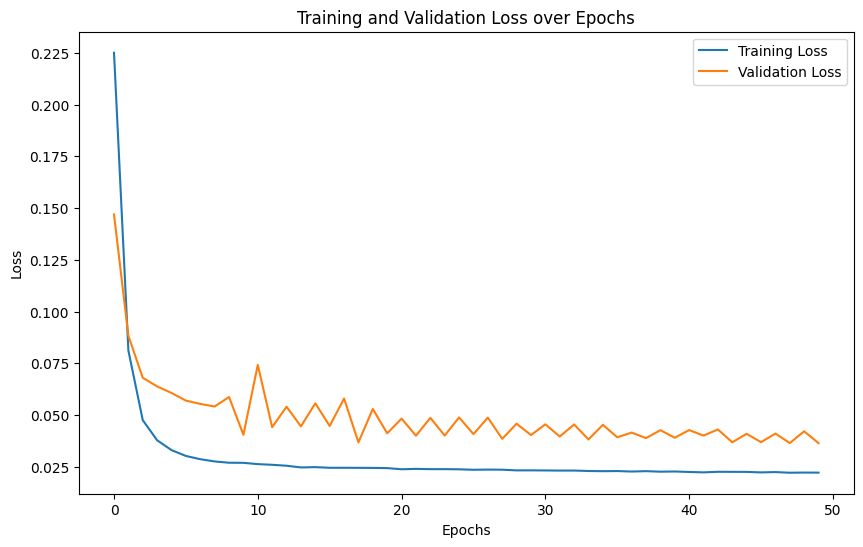

110/110 [==============================] - 0s 2ms/step - loss: 0.0293
Test Loss: 0.02930668741464615
110/110 [==============================] - 0s 2ms/step


In [32]:
# Define time steps and features count
time_steps = 3
features_count = X_scaled.shape[1]

# Create sequences for LSTM
sequences = []
target = []

for i in range(len(X_scaled) - time_steps):
    sequences.append(X_scaled[i:i + time_steps, :])
    target.append(y_scaled[i + time_steps])

X_sequences = np.array(sequences)
y_target = np.array(target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_target, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, features_count)))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions_scaled = model.predict(X_test)

# Inverse transform to get the actual values
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics or visualize results as needed


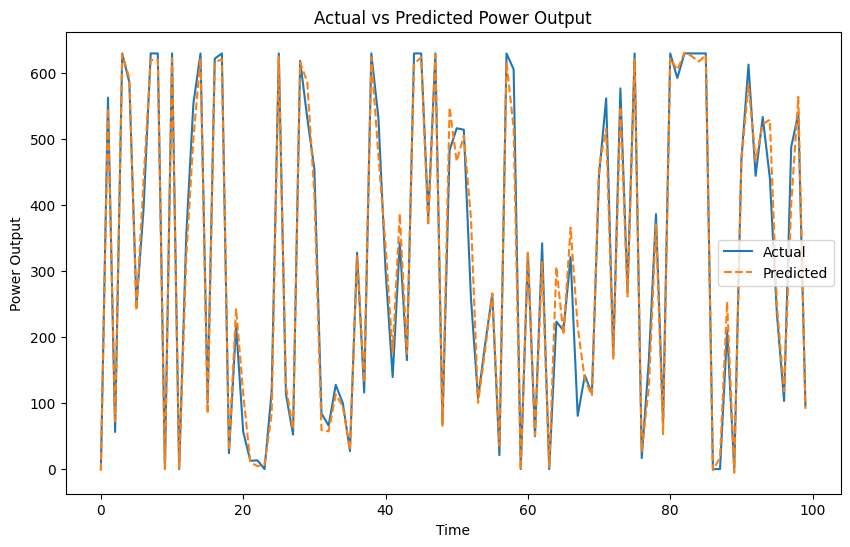

In [33]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted Power Output')
plt.xlabel('Time')
plt.ylabel('Power Output')
plt.legend()
plt.show()

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, Conv1D, Conv2D, Dense, Flatten

In [ ]:


# model_conv1d = Sequential()
# model_conv1d.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(time_steps, features_count)))
# model_conv1d.add(Flatten())
# model_conv1d.add(Dense(1, activation='linear'))  # Adjust activation as needed
# model_conv1d.compile(optimizer='adam', loss='mean_squared_error')

# Build a model with Conv2D
# Assuming your data is reshaped to (samples, time_steps, features_count, 1) for Conv2D

# Train the models


# history_conv1d = model_conv1d.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)


# Plot the training and validation loss for each model
plt.figure(figsize=(15, 8))

# Plot for SimpleRNN


# Plot for Conv1D
# plt.subplot(2, 2, 3)
# plt.plot(history_conv1d.history['loss'], label='Training Loss')
# plt.plot(history_conv1d.history['val_loss'], label='Validation Loss')
# plt.title('Conv1D - Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# Plot for Conv2D


plt.tight_layout()
plt.show()


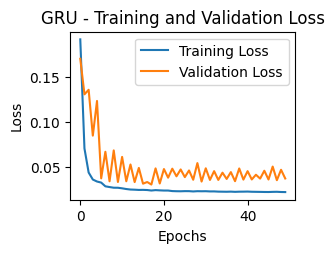

In [36]:
#gru

model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(time_steps, features_count)))
model_gru.add(Dense(1, activation='linear'))  # Adjust activation as needed
model_gru.compile(optimizer='adam', loss='mean_squared_error')

history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

plt.subplot(2, 2, 2)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

110/110 [==============================] - 0s 2ms/step


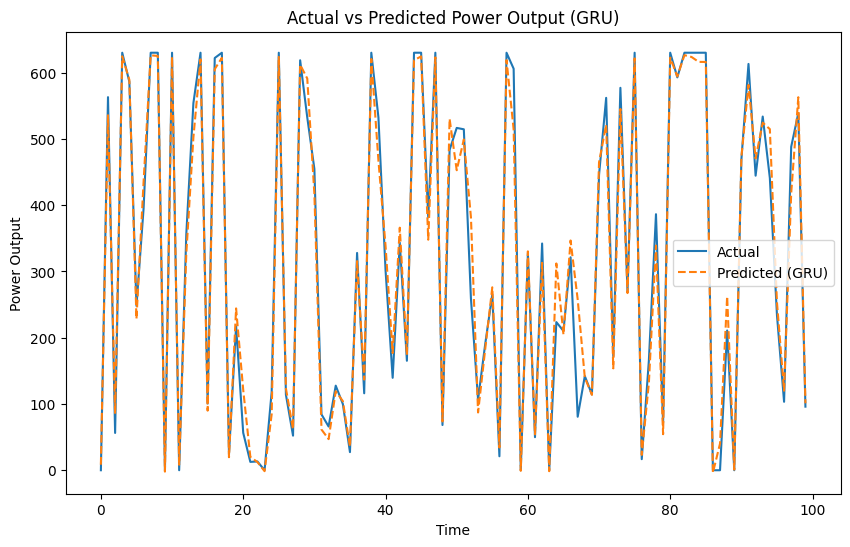

In [38]:
predictions_gru_scaled = model_gru.predict(X_test)
predictions_gru = scaler_y.inverse_transform(predictions_gru_scaled)

# Plot actual vs predicted values for GRU
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(predictions_gru[:100], label='Predicted (GRU)', linestyle='dashed')
plt.title('Actual vs Predicted Power Output (GRU)')
plt.xlabel('Time')
plt.ylabel('Power Output')
plt.legend()
plt.show()

In [ ]:
#conv2d

X_train_2d = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test_2d = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

model_conv2d = Sequential()
model_conv2d.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(time_steps, features_count, 1)))
model_conv2d.add(Flatten())
model_conv2d.add(Dense(1, activation='linear'))  # Adjust activation as needed
model_conv2d.compile(optimizer='adam', loss='mean_squared_error')

history_conv2d = model_conv2d.fit(X_train_2d, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

plt.subplot(2, 2, 4)
plt.plot(history_conv2d.history['loss'], label='Training Loss')
plt.plot(history_conv2d.history['val_loss'], label='Validation Loss')
plt.title('Conv2D - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

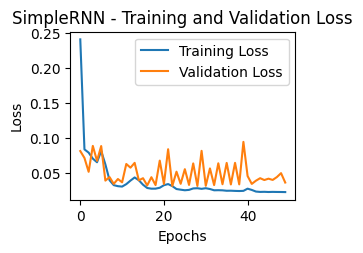

In [39]:
#rnn

model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, features_count)))
model_rnn.add(Dense(1, activation='linear'))  # Adjust activation as needed
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

history_rnn = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

plt.subplot(2, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('SimpleRNN - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

110/110 [==============================] - 1s 3ms/step


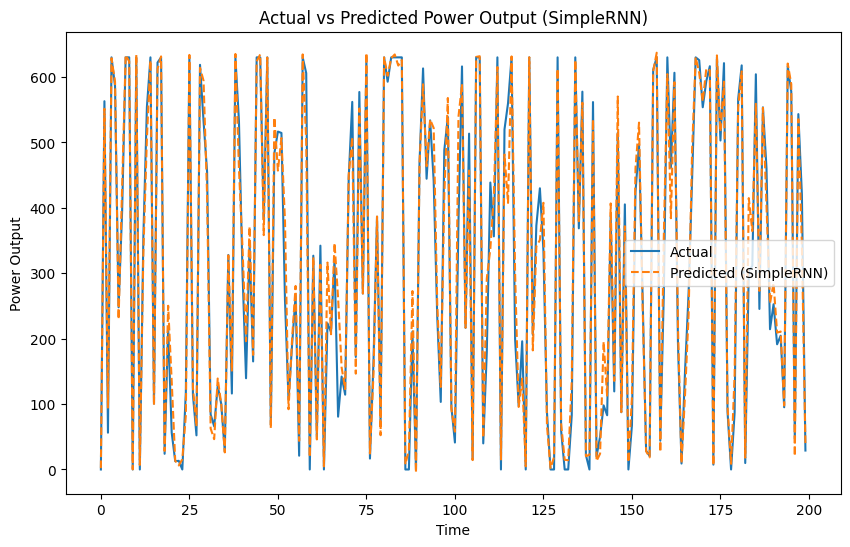

In [40]:
predictions_rnn_scaled = model_rnn.predict(X_test)
predictions_rnn = scaler_y.inverse_transform(predictions_rnn_scaled)

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[:200], label='Actual')
plt.plot(predictions_rnn[:200], label='Predicted (SimpleRNN)', linestyle='dashed')
plt.title('Actual vs Predicted Power Output (SimpleRNN)')
plt.xlabel('Time')
plt.ylabel('Power Output')
plt.legend()
plt.show()